## Final Project Submission

* Student name: Kezia Setokusumo
* Student pace: Self-Paced
* Scheduled project review date/time: Mar 14, 2023
* Instructor name: Mark Barbour
* [Blog post](https://medium.com/@khs366/data-analysis-and-the-rise-of-chatgpt-2e806a5a6b26?source=friends_link&sk=7bb549aafca725c14f640f3e58eaf969)

### Overview and Problem Statement
This project focuses on leveraging data from the [King County House Sales dataset](https://info.kingcounty.gov/assessor/DataDownload/default.aspx) to create a regression model that prices the average home within the region.

The scope of this project includes data cleaning, initial exploratory analysis, model improvement with additional or transformed variables, final recommendation, and overall evaluation.

The goal is to derive a model that helps the general public determine how a certain property should sell compared to the typical home. The model should act as a guide for property buyers and sellers in the area so they can pinpoint attributes of a home that they should emphasize when negotiating prices.

### The Data
The data folder in the repository contains the file kc_house_data.csv, which is the King County House Sales dataset. The folder also contains a description of the columns in the dataset. Below is a list of the columns' names and a preview of the first few rows in the dataset:
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `greenbelt` - Whether the house is adjacent to a green belt
* `nuisance` - Whether the house has traffic noise or other recorded nuisances
* `view` - Quality of view from house
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
* `grade` - Overall grade of the house. Related to the construction and design of the house.
* `heat_source` - Heat source for the house
* `sewer_system` - Sewer system for the house
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `sqft_garage` - Square footage of garage space
* `sqft_patio` - Square footage of outdoor porch or deck space
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `address` - The street address
* `lat` - Latitude coordinate
* `long` - Longitude coordinate

The columns we will use for our analysis are: 
* `sqft_living`
* `bathrooms`
* `grade`
* `waterfront`
* `view`
* `price`

### Methods
Analysis of home prices in King County begins with a baseline regression model. Using the correlation function, an initial predictor is selected. In this case, a baseline regression model is run to show the relationship between home prices `price` and living area `sqft_living`. Data cleaning takes place at this stage to exclude homes built before 1980, and centering is performed to make the values of `sqft_living` and `bathrooms` around its mean. After the parameters from the baseline results are evaluated, another numerical predictor is added to create a second model. After two models with only numerical predictors have been run, a third and fourth model containing categorical variables is created to improve the analysis. Throughout the creation of the four models, different variables were tested to determine which ones were statistically significant. The final model builds on the fourth regression (a combination of numerical and categorical predictors) by including interaction terms. The variables in the fourth model are tested for interaction effects, and statistically significant terms are incorporated to construct the fifth and final model.

### Data Exploration and Cleaning

In [1]:
# Import pandas library and housing dataset
import pandas as pd
data=pd.read_csv('kc_house_data.csv', index_col=0)

In [2]:
# Inspect data
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
# Inspect columns
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'greenbelt', 'nuisance', 'view', 'condition',
       'grade', 'heat_source', 'sewer_system', 'sqft_above', 'sqft_basement',
       'sqft_garage', 'sqft_patio', 'yr_built', 'yr_renovated', 'address',
       'lat', 'long'],
      dtype='object')

In [4]:
# Drop rows with null values
data=data.dropna()

In addition to dropping rows that contain null values, we want to exclude any outdated information. We will do this by inspecting the `yr_built` column, identifying the average year, and dropping rows for properties that were built before then. The process is done below.

In [5]:
# Inspect "yr_built"
data['yr_built'].describe() 

count    30111.000000
mean      1975.162299
std         32.052930
min       1900.000000
25%       1953.000000
50%       1977.000000
75%       2003.000000
max       2022.000000
Name: yr_built, dtype: float64

The average year is around 1975, so we will exclude homes before then.

In [6]:
# Exclude homes that were built before 1975 to make the information more relevant
data=data[data['yr_built']>=1975]
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
id,,,,,,,,,,,,,,,,,,,,,
1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.290200
8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.071880
7137850210,4/28/2022,820000.0,3,2.5,2214,3506,2.0,NO,NO,NO,...,PUBLIC,2214,0,440,206,2019,0,"24913 122nd Place Southeast, Kent, Washington ...",47.378355,-122.178625
2944500680,3/17/2022,780000.0,4,2.5,2340,8125,2.0,NO,NO,NO,...,PUBLIC,2340,0,440,70,1989,0,"2721 Southwest 343rd Place, Federal Way, Washi...",47.293770,-122.369320
2619950340,6/21/2021,975000.0,4,2.5,2980,5859,2.0,NO,NO,NO,...,PUBLIC,2980,0,540,170,2011,0,"27950 Northeast 147th Circle, Duvall, Washingt...",47.733170,-121.965305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6142050730,6/3/2022,1325000.0,5,3.5,3100,6428,2.0,NO,NO,NO,...,PUBLIC,3100,0,710,110,2018,0,"28910 Northeast 156th Street, Duvall, Washingt...",47.740145,-121.952390
9376300851,10/7/2021,719000.0,3,2.5,1270,1141,2.0,NO,NO,NO,...,PUBLIC,1050,420,200,60,2007,0,"8359 11th Avenue Northwest, Seattle, Washingto...",47.690440,-122.370620
194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.388510


### Identify the Initial Predictor
Now that we've cleaned some of the data by dropping several rows, we will look for an initial predictor to use for the baseline model. We will do this by looking at each variable's relationship with price and creating a correlation heatmap. The outputs are displayed below.

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'sqft_above'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>],
       [<AxesSubplot:title={'center':'sqft_garage'}>,
        <AxesSubplot:title={'center':'sqft_patio'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'yr_renovated'}>],
       [<AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

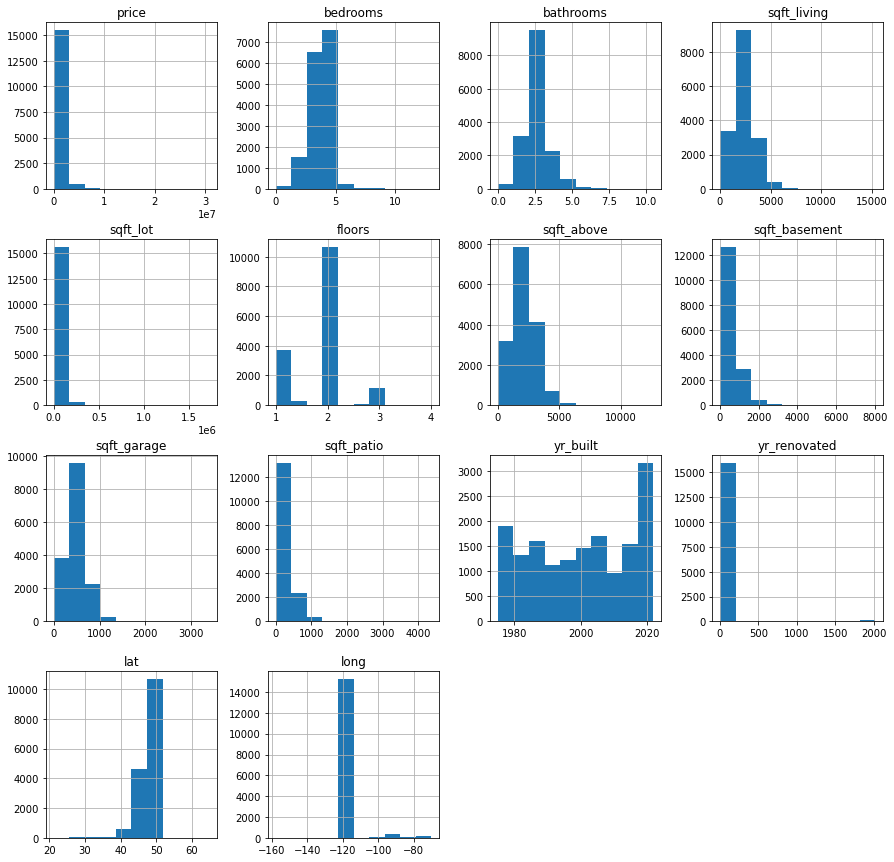

In [7]:
data.hist(figsize=(15,15))

Text(0.5, 1.0, 'Correlation Heatmap')

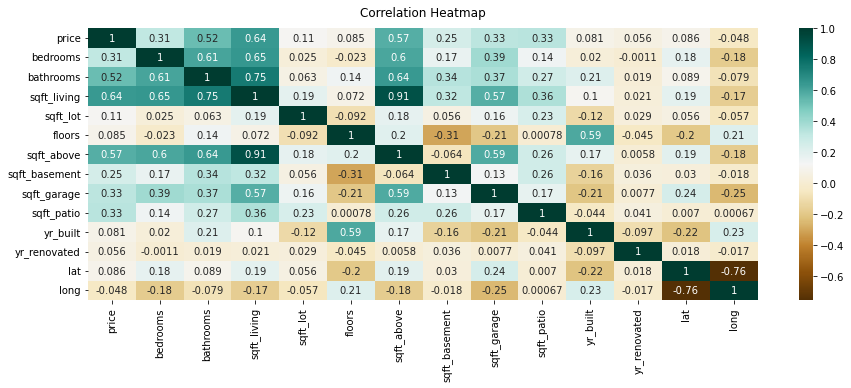

In [8]:
# Look at correlations and identify a highly correlated predictor to create the baseline model
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
heatmap=sns.heatmap(data.corr(), annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', pad=12)

### Findings
`sqft_living` is the most correlated variable with `price`

### Baseline Model
Now that we've selected the first variable `sqft_living`, we will center this data around its average and leverage statsmodels to create the first model. Centering the data will make the results more interpretable later.

In [9]:
# Import statsmodels for regression analysis
import statsmodels.api as sm
# Create a baseline model with 'price' as the dependent variable and 'sqft_living' as independent variable
# Make the data more interpretable by centering and subtracting the mean from 'sqft_living'
data['sqft_living']=data['sqft_living']-data['sqft_living'].mean()
y=data['price']
X=data[['sqft_living']]
baseline=sm.OLS(y, sm.add_constant(X))
baseline_results=baseline.fit()
# Display baseline model's summary statistics
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                 1.105e+04
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:10:33   Log-Likelihood:            -2.3985e+05
No. Observations:               16037   AIC:                         4.797e+05
Df Residuals:                   16035   BIC:                         4.797e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.198e+06   5976.994    200.462      

### Baseline Model Interpretation
R-squared is 0.408, meaning that 40.8% of the variation is explained by the baseline model. The p-values for the y-intercept, sqft_living, and overall model are statistically significant. The coefficient for `sqft_living` indicates that every unit increase of living area SF results in a $609 increase in the price of the average-sized home.

### Baseline Model Visualization
Below we create a scatterplot and its corresponding regression line to better illustrate the relationship between `sqft_living` and `price`. Note that the negative x-axis is because we have centered the data.

Text(0.5, 1.0, 'Baseline Model Visualization')

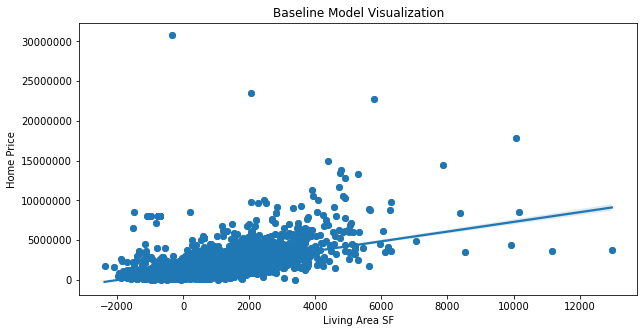

In [10]:
# Visualize the baseline model
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X, y)
sns.regplot(x='sqft_living', y='price', data=data)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
ax.set_xlabel("Living Area SF")
ax.set_ylabel("Home Price")
ax.set_title("Baseline Model Visualization")

### Baseline Model Error Metric
We will calculate the mean absolute error for our simple linear regression to determine how wrong our model is on average when projecting prices.

In [11]:
# Compute mean absolute error for baseline model
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred_baseline=baseline_results.predict(sm.add_constant(data['sqft_living']))
mae_base=mean_absolute_error(data['price'], y_pred_baseline)
print("The mean absolute error for the initial model is: "+ str(mae_base))

The mean absolute error for the initial model is: 423369.63912455307


Our mean absolute error comes out to ~$423K. The MAE characterizes the difference between the model's prediction and the target value. For home prices, this value is quite large. We will aim to reduce the MAE over the next few iterations of the model and arrive at a lower MAE value for the final run.

### Second Model (Multiple Regression Model)
We will expand the simple linear regression baseline model to a multiple linear regression model by including `bathrooms`.

In [12]:
# Expand the simple linear regression baseline model to a multiple linear regression model
# Add the discrete numerical predictor "bathrooms" and center it
data['bathrooms']=data['bathrooms']-data['bathrooms'].median()
X_second = data[['sqft_living', 'bathrooms']]
X_second

,sqft_living,bathrooms
id,,
1604601802,-223.129077,0.5
8562780790,-1263.129077,-0.5
7137850210,-169.129077,0.0
2944500680,-43.129077,0.0
2619950340,596.870923,0.0
...,...,...
6142050730,716.870923,1.0
9376300851,-1113.129077,0.0
194000695,-363.129077,-0.5


In [13]:
# Create the second model and results summary
second=sm.OLS(y, sm.add_constant(X_second))
second_results=second.fit()
print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     5628.
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:10:34   Log-Likelihood:            -2.3979e+05
No. Observations:               16037   AIC:                         4.796e+05
Df Residuals:                   16034   BIC:                         4.796e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.172e+06   6400.263    183.178      

### Second Model Interpretation
We have a slightly improved R-squared value, and 41.2% of the price variation is explained. All predictors and the overall model are statistically significant. Thus, a home with average living area and number of bathrooms can be expected to sell for around 1.2 million, and increases in `sqft_living` and `bathrooms` inflate prices by 537 and 13K, respectively.

### Third Model (Multiple Regression Model Cont.)
Certain columns are not in the form of numbers, but we hypothesize they may have a significant impact on price levels. For instance, `grade` logically sounds like a variable that will influence how much a property sells for. We will inspect the initial data and remap the `grade` column so we can use it in our analysis. We will also visualize the relationship between `grade` and `price`. We expect prices to rise with grade ratings.

In [14]:
# "grade" appears to be correlated with price as well
# Inspect values
grade_data=data['grade'].copy()
grade_data

id
1604601802     9 Better
8562780790    7 Average
7137850210       8 Good
2944500680       8 Good
2619950340       8 Good
                ...    
6142050730       8 Good
9376300851       8 Good
194000695     7 Average
7960100080    7 Average
2781280080       8 Good
Name: grade, Length: 16037, dtype: object

In [15]:
# "grade" is a discrete variable in the form of a string
# Create another dataframe to include "grade" with the previous model
X_third=data[['sqft_living', 'bathrooms', 'grade']]

# Since "grade" is in string form, we need to map the column and replace it with its corresponding number
# Create a dictionary for the mapping process
grade_mapper = {"2 Substandard": 2, "4 Low": 4, "5 Fair":5, "6 Low Average": 6, "7 Average": 7, "8 Good": 8, "9 Better": 9, "10 Very Good": 10, "11 Excellent": 11, "12 Luxury": 12, "13 Mansion": 13}

# Replace the values in the column with those in the "grade_mapper" dictionary
data['grade']=data['grade'].replace(grade_mapper)
X_third["grade"] = data['grade']

/var/folders/79/5nwh277d2kz9wy43lcqjbbkr0000gn/T/ipykernel_2927/291473580.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_third["grade"] = data['grade']


In [16]:
# Center the data again to make it consistent
X_third["grade"]=X_third["grade"]-X_third['grade'].median()
X_third

/var/folders/79/5nwh277d2kz9wy43lcqjbbkr0000gn/T/ipykernel_2927/2517493828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_third["grade"]=X_third["grade"]-X_third['grade'].median()


,sqft_living,bathrooms,grade
id,,,
1604601802,-223.129077,0.5,1.0
8562780790,-1263.129077,-0.5,-1.0
7137850210,-169.129077,0.0,0.0
2944500680,-43.129077,0.0,0.0
2619950340,596.870923,0.0,0.0
...,...,...,...
6142050730,716.870923,1.0,0.0
9376300851,-1113.129077,0.0,0.0
194000695,-363.129077,-0.5,-1.0


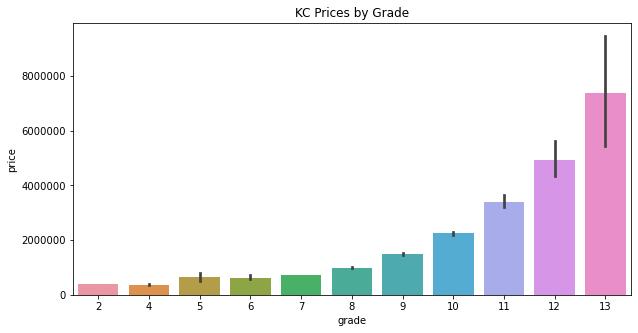

In [17]:
# Visualize data of grade versus price
plt.figure(figsize=(10,5))
df=data[['grade', 'price']]
sns.barplot(data=df, x='grade', y='price').set(title='KC Prices by Grade')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

The relationship shown in the graph is in line with what we expect. Now that we have transformed the `grade` column to be numeric, we will include it in our regression model and create another summary output.

In [18]:
# Create the third model with "grade" and print results
third=sm.OLS(data['price'], sm.add_constant(X_third))
third_results=third.fit()
print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     4746.
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:10:34   Log-Likelihood:            -2.3896e+05
No. Observations:               16037   AIC:                         4.779e+05
Df Residuals:                   16033   BIC:                         4.780e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.124e+06   6184.711    181.789      

### Third Model Interpretation
All variables and the model are statistically significant. We predict that an additional grade will increase the value of the average home by ~$31K.

### Fourth Model (Categorical Predictors)

In [19]:
# Add categorical variables ('waterfront' and 'view') and dummify them
X_fourth=X_third[['sqft_living', 'bathrooms', 'grade']]
X_fourth['waterfront']=data['waterfront']
X_fourth['view']=data['view']
X_fourth=pd.get_dummies(X_fourth, columns=['waterfront', 'view'])

# Drop the columns below to make them the reference category
X_fourth.drop(columns=['waterfront_NO', 'view_AVERAGE'], inplace=True)

# Pass the dataframe into statsmodels and print results
fourth=sm.OLS(data['price'], sm.add_constant(X_fourth))
fourth_results=fourth.fit()
print(fourth_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     2087.
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:10:34   Log-Likelihood:            -2.3833e+05
No. Observations:               16037   AIC:                         4.767e+05
Df Residuals:                   16028   BIC:                         4.767e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.144e+06    2.5e+04     45.

The fourth model accounts for 51.1% of the variance in sale price and models against a reference home with average living area, bathrooms, grade, view, and no waterfront. We cannot conclude that `view_GOOD` nor `view_NONE` has a statistically significant impact on price. However, fair and excellent views appear to influence home values against the reference property.

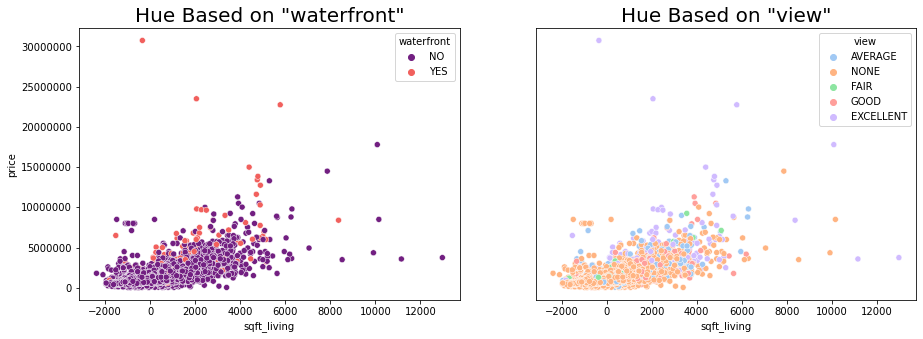

In [20]:
# Visualize 'sqft_living' vs. 'price' and make the color hues based on 'waterfront' using seaborn
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
sns.scatterplot(x=data['sqft_living'], y=data['price'], hue=data['waterfront'], data=data, palette='magma', ax=ax1)
ax1.set_title('Hue Based on "waterfront"', fontsize=20)

# The same visualization is run, with hues based on 'view
sns.scatterplot(x=data['sqft_living'], y=data['price'], hue=data['view'], data=data, palette='pastel', ax=ax2)
ax2.set(ylabel=None)
ax2.tick_params(left=False)
ax2.set(yticklabels=[])
ax2.set_title('Hue Based on "view"', fontsize=20)

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

### Summary Table of Regressions Thus Far

In [21]:
# Create a summary table of regressions that have been run
summary_table=pd.DataFrame({'Model': [], 'Independent Variables':[], 'R-squared':[],
                                'Adj R-squared':[]})
summary_table.loc[0]=('Baseline Model', 'sqft_living', baseline_results.rsquared, baseline_results.rsquared_adj)
summary_table.loc[1]=('Second Model', 'sqft_living, bathrooms', second_results.rsquared, second_results.rsquared_adj)
summary_table.loc[2]=('Third Model', 'sqft_living, bathrooms, grade', third_results.rsquared, third_results.rsquared_adj)
summary_table.loc[3]=('Fourth Model', 'sqft_living, bathrooms, grade, waterfront, view', fourth_results.rsquared, fourth_results.rsquared_adj)
pd.set_option('max_colwidth', 90)
summary_table

,Model,Independent Variables,R-squared,Adj R-squared
0,Baseline Model,sqft_living,0.408050,0.408013
1,Second Model,"sqft_living, bathrooms",0.412473,0.412399
2,Third Model,"sqft_living, bathrooms, grade",0.470337,0.470238
3,Fourth Model,"sqft_living, bathrooms, grade, waterfront, view",0.510179,0.509935


### Final Model (Interaction Term)

In [22]:
# Construct a final model with an interaction term
# Create an initial dataframe without an interaction term
X_no_interaction = data[['sqft_living', 'bathrooms', 'waterfront', 'view']].copy()
X_no_interaction['grade']=X_fourth['grade']
X_no_interaction = pd.get_dummies(X_no_interaction, columns=['waterfront', 'view'])
X_no_interaction.drop(columns=['waterfront_NO','view_AVERAGE'], inplace=True)

# Add the interaction term
# Explore how adding more space to homes with amenities like a waterfront impact property values
X_interaction=X_no_interaction.copy()
X_interaction["sqft_living x waterfront_YES"] = X_interaction["sqft_living"] * X_interaction["waterfront_YES"]
X_interaction

,sqft_living,bathrooms,grade,waterfront_YES,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,sqft_living x waterfront_YES
id,,,,,,,,,
1604601802,-223.129077,0.5,1.0,0,0,0,0,0,-0.0
8562780790,-1263.129077,-0.5,-1.0,0,0,0,0,1,-0.0
7137850210,-169.129077,0.0,0.0,0,0,0,0,1,-0.0
2944500680,-43.129077,0.0,0.0,0,0,0,0,1,-0.0
2619950340,596.870923,0.0,0.0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
6142050730,716.870923,1.0,0.0,0,0,0,0,1,0.0
9376300851,-1113.129077,0.0,0.0,0,0,0,0,1,-0.0
194000695,-363.129077,-0.5,-1.0,0,0,1,0,0,-0.0


In [23]:
# Pass the interaction dataframe into statsmodels
interaction_model = sm.OLS(data['price'], sm.add_constant(X_interaction))
interaction_results = interaction_model.fit()

# Inspect the p-values of the independent variables in the final model
pvalues_df = pd.DataFrame(interaction_results.pvalues, columns=["p-value"])
pvalues_df["p < 0.05"] = pvalues_df["p-value"] < 0.05
pvalues_df

,p-value,p < 0.05
const,0.000000e+00,True
sqft_living,7.640501e-196,True
bathrooms,3.199481e-26,True
grade,0.000000e+00,True
waterfront_YES,6.189848e-09,True
view_EXCELLENT,7.070272e-46,True
view_FAIR,6.803259e-04,True
view_GOOD,9.737306e-01,False
view_NONE,2.680002e-03,True
sqft_living x waterfront_YES,2.499090e-100,True


In [24]:
# Return another dataframe that excludes statistically insignificant predictors
X_interaction2=X_interaction.copy()
X_interaction2=X_interaction2.drop(columns=['view_GOOD'])
X_interaction2

,sqft_living,bathrooms,grade,waterfront_YES,view_EXCELLENT,view_FAIR,view_NONE,sqft_living x waterfront_YES
id,,,,,,,,
1604601802,-223.129077,0.5,1.0,0,0,0,0,-0.0
8562780790,-1263.129077,-0.5,-1.0,0,0,0,1,-0.0
7137850210,-169.129077,0.0,0.0,0,0,0,1,-0.0
2944500680,-43.129077,0.0,0.0,0,0,0,1,-0.0
2619950340,596.870923,0.0,0.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...
6142050730,716.870923,1.0,0.0,0,0,0,1,0.0
9376300851,-1113.129077,0.0,0.0,0,0,0,1,-0.0
194000695,-363.129077,-0.5,-1.0,0,0,1,0,-0.0


In [25]:
# Check that all predictors are significant
interaction2_model=sm.OLS(data['price'], sm.add_constant(X_interaction2))
interaction2_results=interaction2_model.fit()
pvalues_df = pd.DataFrame(interaction2_results.pvalues, columns=["p-value"])
pvalues_df["p < 0.05"] = pvalues_df["p-value"] < 0.05
pvalues_df

,p-value,p < 0.05
const,0.000000e+00,True
sqft_living,4.802525e-196,True
bathrooms,3.155225e-26,True
grade,0.000000e+00,True
waterfront_YES,6.105523e-09,True
view_EXCELLENT,3.089371e-49,True
view_FAIR,5.482284e-04,True
view_NONE,3.919955e-04,True
sqft_living x waterfront_YES,2.317819e-100,True


In [26]:
# Print results of the final model
print(interaction2_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     2204.
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:10:35   Log-Likelihood:            -2.3810e+05
No. Observations:               16037   AIC:                         4.762e+05
Df Residuals:                   16028   BIC:                         4.763e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Final Model Error Metric
We will calculate the mean absolute error for our final regression model to determine how wrong our model is on average when projecting prices. We will compare this MAE with that of the baseline's.

In [27]:
# Compute mean absolute error for final model
y_pred=interaction2_results.predict(sm.add_constant(X_interaction2))
mae_final=mean_absolute_error(data['price'], y_pred)
f"The mean absolute error for the final model is: {mae_final}"

'The mean absolute error for the final model is: 370183.43826478004'

The mean absolute error for the final model is 370183.43826478004, which is significantly less than our baseline MAE of 423369.63912455307. Though there is still room for further improvement to reduce the average error from $370K, there is now a reduction in MAE by 12.56% compared to our initial run.

### Final Model Interpretation / Conclusion
Homesellers who are looking for price guidance can refer to the regression models to determine how a given property compares to the average home in King County. The model prices the typical home with standard features at ~1.2 Million. Additionally, adjusting variables within a home that has certain "nice-to-have" amenities, such as a waterfront, has a greater impact on value. This is shown through the interaction term `sqft_living x waterfront_YES`, which indicates that a unit increase in `sqft_living` for an average-sized home with a waterfront adds ~629 instead of just 269. Moreover, `view_EXCELLENT` has the largest impact on price, with an expected increase of $82K. 

### Recommendation
Homesellers interested in maximizing the value of their properties should aim to include at least one extra amenity (e.g. waterfront, excellent views), as additional features can greatly elevate values of the average property.

### Future Considerations
* Using variables like `lat` and `long` to visualize the geographical distribution of homes would improve the model, as location is arguably the most important aspect of real estate
* Leveraging population and socioeconomic data can provide insight into the typical homebuyer in the King County region
* Enhancing the models with log or polynomial transformations to depict a more accurate relationship between variables

### Appendix: Additional Transformation to Address Linearity Assumptions

One of the main assumptions behind this analysis is that the relationship between dependent and independent variables is linear. However, that is often not the case. In the cells that follow we will create a residuals plot and a partial regression plot to determine the likelihood of a linear relationship. Then, we will run a model transformation to at least partially remedy the issue.

Text(0.5, 1.0, 'Final Model Residual Plot')

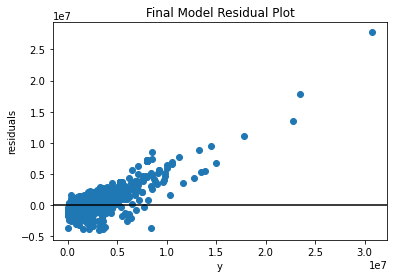

In [28]:
# create a residuals plot from the final regression run
fig, ax = plt.subplots()
ax.scatter(data['price'], interaction2_results.resid)
ax.axhline(y=0, color='black')
ax.set_xlabel("y")
ax.set_ylabel("residuals")
ax.set_title("Final Model Residual Plot")

Becuase the plot of the residuals do not mimic a residual plot of a linear relationship, we will try to investigate further with a partial regression plot below.

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


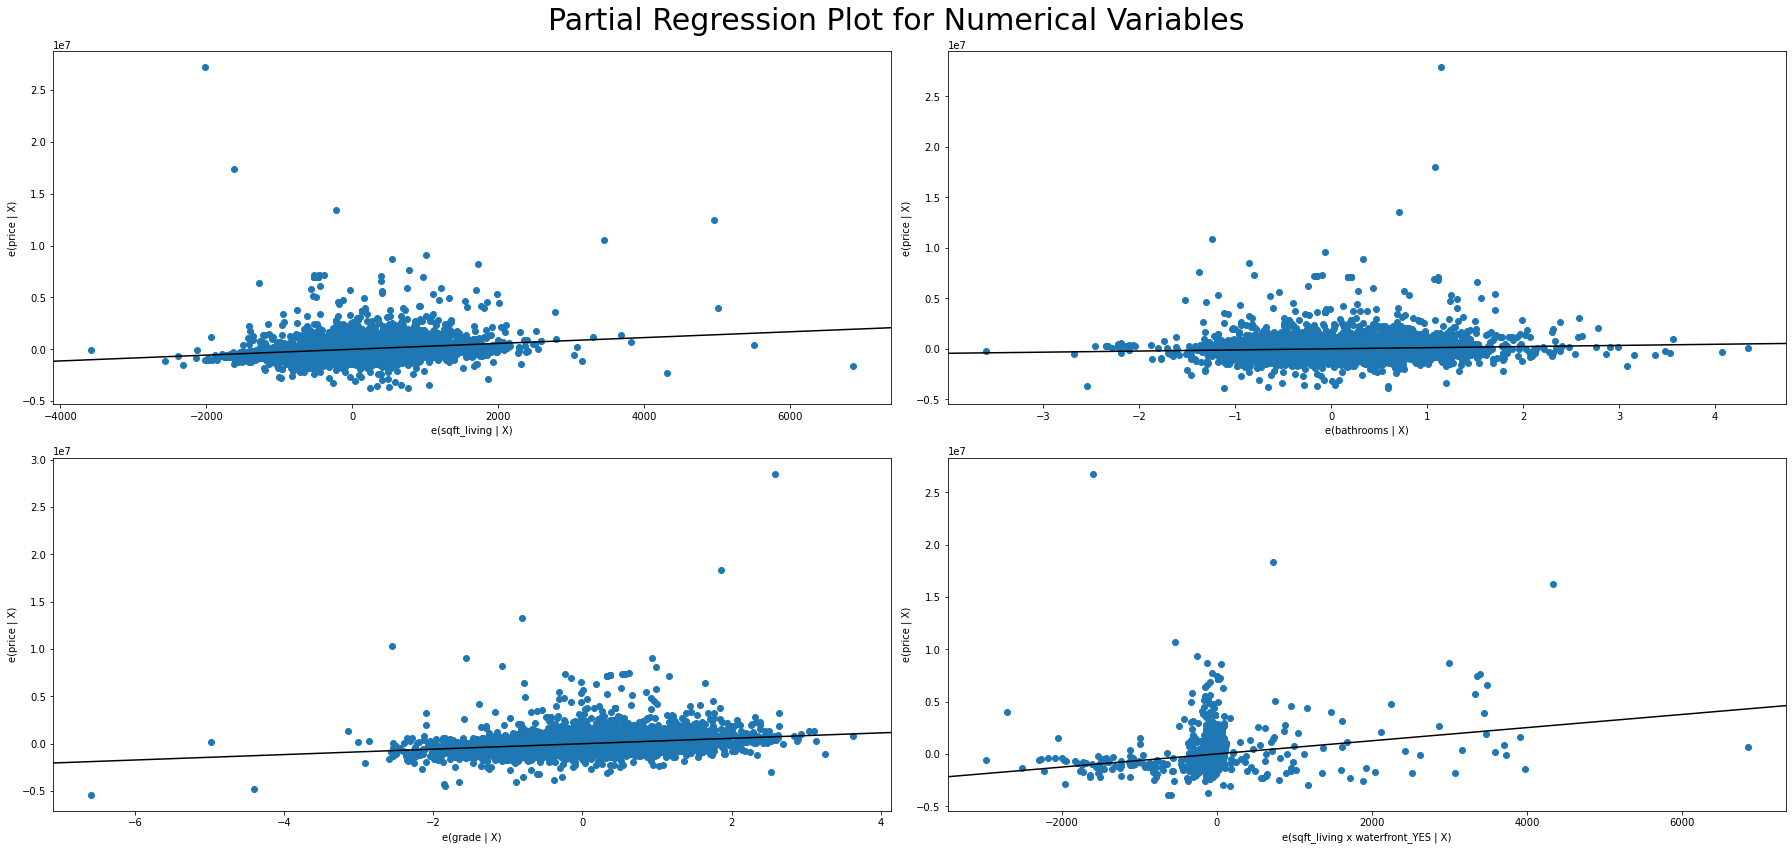

In [29]:
# create a partial regression plot with the numerical variables used in the final model
fig = plt.figure(figsize=(25,12))
sm.graphics.plot_partregress_grid(interaction2_results, exog_idx=["sqft_living", "bathrooms", "grade", "sqft_living x waterfront_YES"], fig=fig)
fig.suptitle("Partial Regression Plot for Numerical Variables", fontsize=30)
plt.tight_layout()
plt.show()

Since there appears to be a bit of a curvature with each of the partial regression plots, we will try to remedy the issue by conducting a log transformation below.

In [30]:
import numpy as np # import numpy
data2=pd.read_csv('kc_house_data.csv', index_col=0) # reload the raw dataset 
data2=pd.DataFrame(data2) # pass the raw dataset into a dataframe
# map the column "grade" with numerical values
grade_mapper = {"1 Cabin": 1, "2 Substandard": 2, "3 Poor": 3, "4 Low": 4, "5 Fair":5, "6 Low Average": 6, "7 Average": 7, "8 Good": 8, "9 Better": 9, "10 Very Good": 10, "11 Excellent": 11, "12 Luxury": 12, "13 Mansion": 13}
data2['grade']=data2['grade'].replace(grade_mapper)
data2.dropna(inplace=True) # drop null rows
data2=data2[data2['yr_built']>=1975] # exclude data for homes before 1975 to prevent oudated information
y_log=data2['price']
y_log=np.log(y_log) # log transform the target using numpy
y_log # display output

id
1604601802    13.560618
8562780790    13.292106
7137850210    13.617060
2944500680    13.567049
2619950340    13.790193
                ...    
6142050730    14.096923
9376300851    13.485617
194000695     14.087825
7960100080    13.592367
2781280080    13.560618
Name: price, Length: 16037, dtype: float64

Now that we have transformed the `price` column, we will inspect the data's distribution in the graph below and compare it to a graph that shows the original, untransformed data.

Text(0.5, 1.0, 'Log Transformed Data')

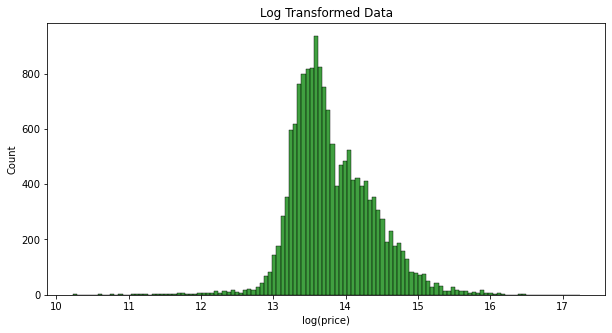

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(y_log, color='green') # plot a seaborn histogram with the log price
plt.xlabel('log(price)')
plt.title('Log Transformed Data')

At an initial glance, this graph looks decently normally distributed. The next graph shows what the raw distribution would look like, and we can clearly see the data is right-skewed.

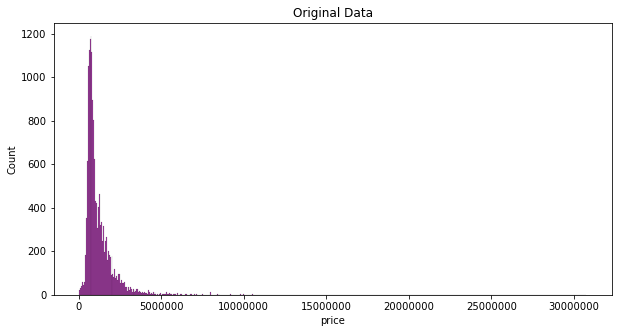

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data2['price'], color='purple') # plot a seaborn histogram with the original price values
plt.title('Original Data')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)

The last few cells that follow recreate the dataframe and pass it with the transformed target into statsmodels to create a summary output.

In [33]:
X_t=data2[['sqft_living', 'bathrooms', 'grade']]
X_t['waterfront']=data2['waterfront']
X_t['view']=data2['view']
X_t=pd.get_dummies(X_t, columns=['waterfront', 'view'])
# Drop the columns below to make them the reference category
X_t.drop(columns=['waterfront_NO', 'view_AVERAGE'], inplace=True)

# Pass the dataframe into statsmodels and print results
X_t_model=sm.OLS(y_log, sm.add_constant(X_t))
X_t_results=X_t_model.fit()
print(X_t_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     2368.
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        00:10:36   Log-Likelihood:                -7489.0
No. Observations:               16037   AIC:                         1.500e+04
Df Residuals:                   16028   BIC:                         1.507e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             11.5533      0.032    358.

/var/folders/79/5nwh277d2kz9wy43lcqjbbkr0000gn/T/ipykernel_2927/3414476695.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_t['waterfront']=data2['waterfront']
/var/folders/79/5nwh277d2kz9wy43lcqjbbkr0000gn/T/ipykernel_2927/3414476695.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_t['view']=data2['view']


Though in terms of R-squared value our transformed model performs similarly to the final regression model, the Jarque-Bera (JB) statistic is much lower than any of the JB values of the regressions we previously created. The closer the JB value is to zero, the more likely the data is normally distributed with mean and variance. Hence, this points to a slightly more linear relationship than what was previously modeled.